# HOUSING: PRICE PREDICTION
## Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

#### For this company wants to know:
* Which variables are important to predict the price of variable?
* How do these variables describe the price of the house?

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### Technical Requirements:
* Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
* You need to find important features which affect the price positively or negatively.
* Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

#### The “Data file.csv” and “Data description.txt” are enclosed with this file.

# Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

# View the datset

In [3]:
# For viiewing Maximum rows and columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

# Only for designing purpose
def printmd(string):
    display(Markdown(string))
    
def printcl(string, color=None):
    colorstr="<span style = 'color : {}'>{}</span>".format(color,string)
    display(Markdown(colorstr))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,408.0,TA,TA,CBlock,TA,Fa,No,BLQ,309,Unf,0,174,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


# Shape of the data sets

In [6]:
train.shape, test.shape

((1168, 81), (292, 80))

# Check the cosine summary of the dataset

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Check uniqueness

In [8]:
train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

# Check Null values

In [9]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Data Pre-processing

In [10]:
for i in train.columns:
    if train[i].dtype=='O':
        train[i]=train[i].fillna(train[i].mode()[0])
        
for j in train.columns:
    if train[j].dtype!='O':
        train[j]=train[j].fillna(train[j].mean())

In [11]:
for i in test.columns:
    if test[i].dtype=='O':
        test[i]=test[i].fillna(test[i].mode()[0])
        
for j in test.columns:
    if test[j].dtype!='O':
        test[j]=test[j].fillna(test[j].mean())

In [12]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

# Data Visualization 

## Categorical Visualization

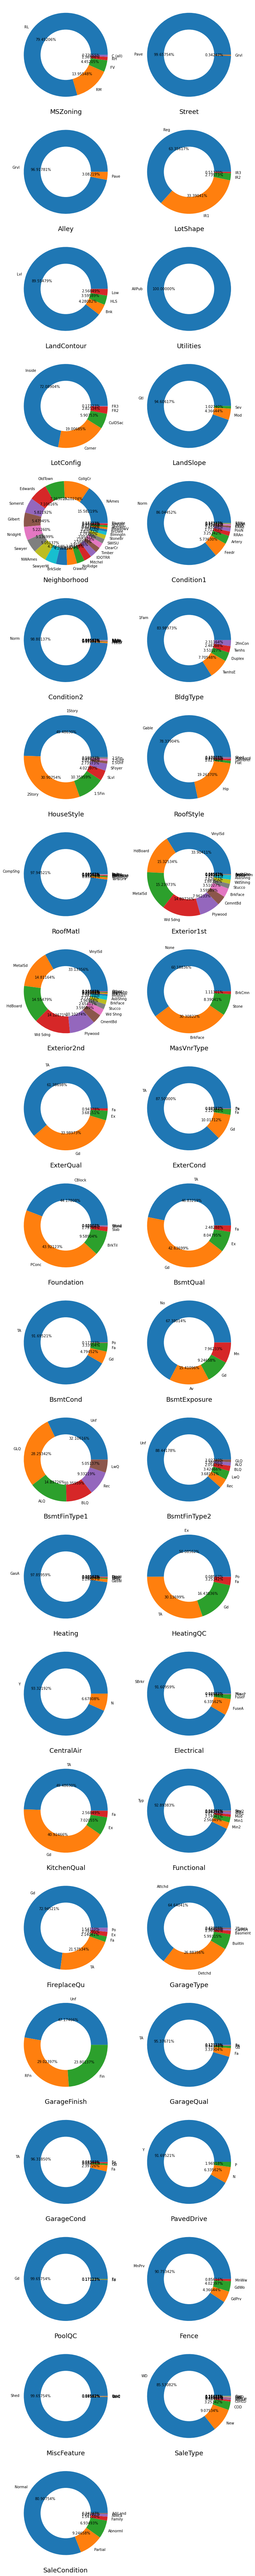

In [13]:
plt.figure(figsize=(10,100))
n=1
for i in train.columns:
    if train[i].dtype=='O' and n<=44:
                    plt.subplot(22,2,n)
                    train[i].value_counts().plot.pie(autopct='%1.5f%%')
                    centre=plt.Circle((0,0),0.6,fc='white')
                    fig=plt.gcf()
                    fig.gca().add_artist(centre)
                    plt.xlabel(i, fontsize=18)
                    plt.ylabel('')
                    n+=1
    plt.tight_layout()

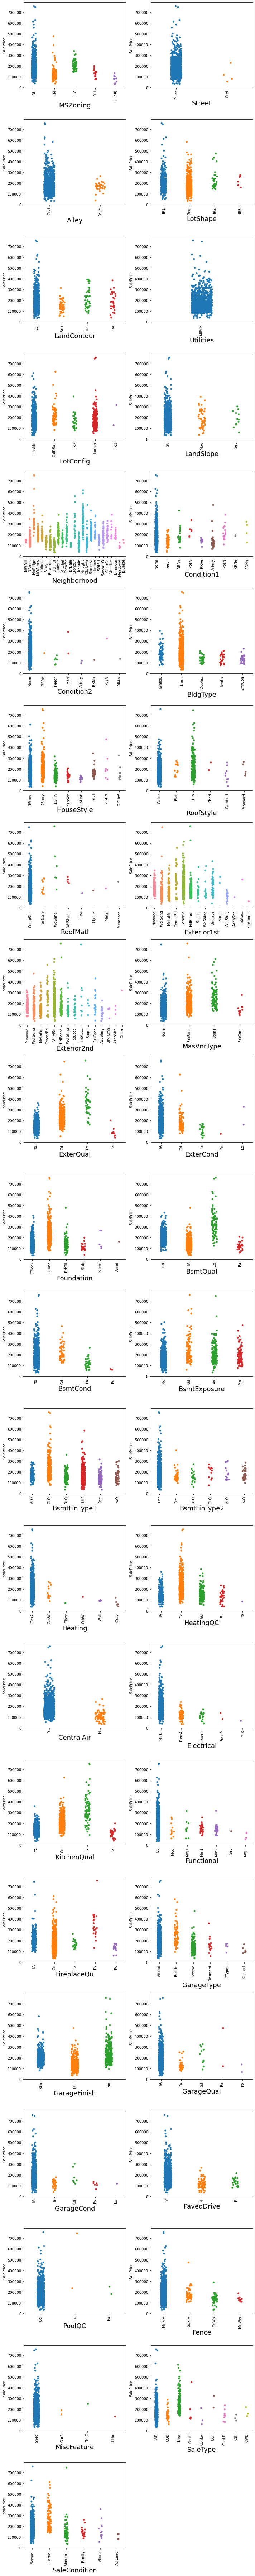

In [14]:
plt.figure(figsize=(10,100))
n=1
for i in train.columns:
    if train[i].dtype=='O' and n<=44:
        ax=plt.subplot(22,2,n)
        sns.stripplot(x=train[i], y=train.SalePrice, data=train)
        plt.xlabel(i, fontsize=18)
        plt.xticks(rotation=90)
        n+=1
    plt.tight_layout()

# Numerical Visualization

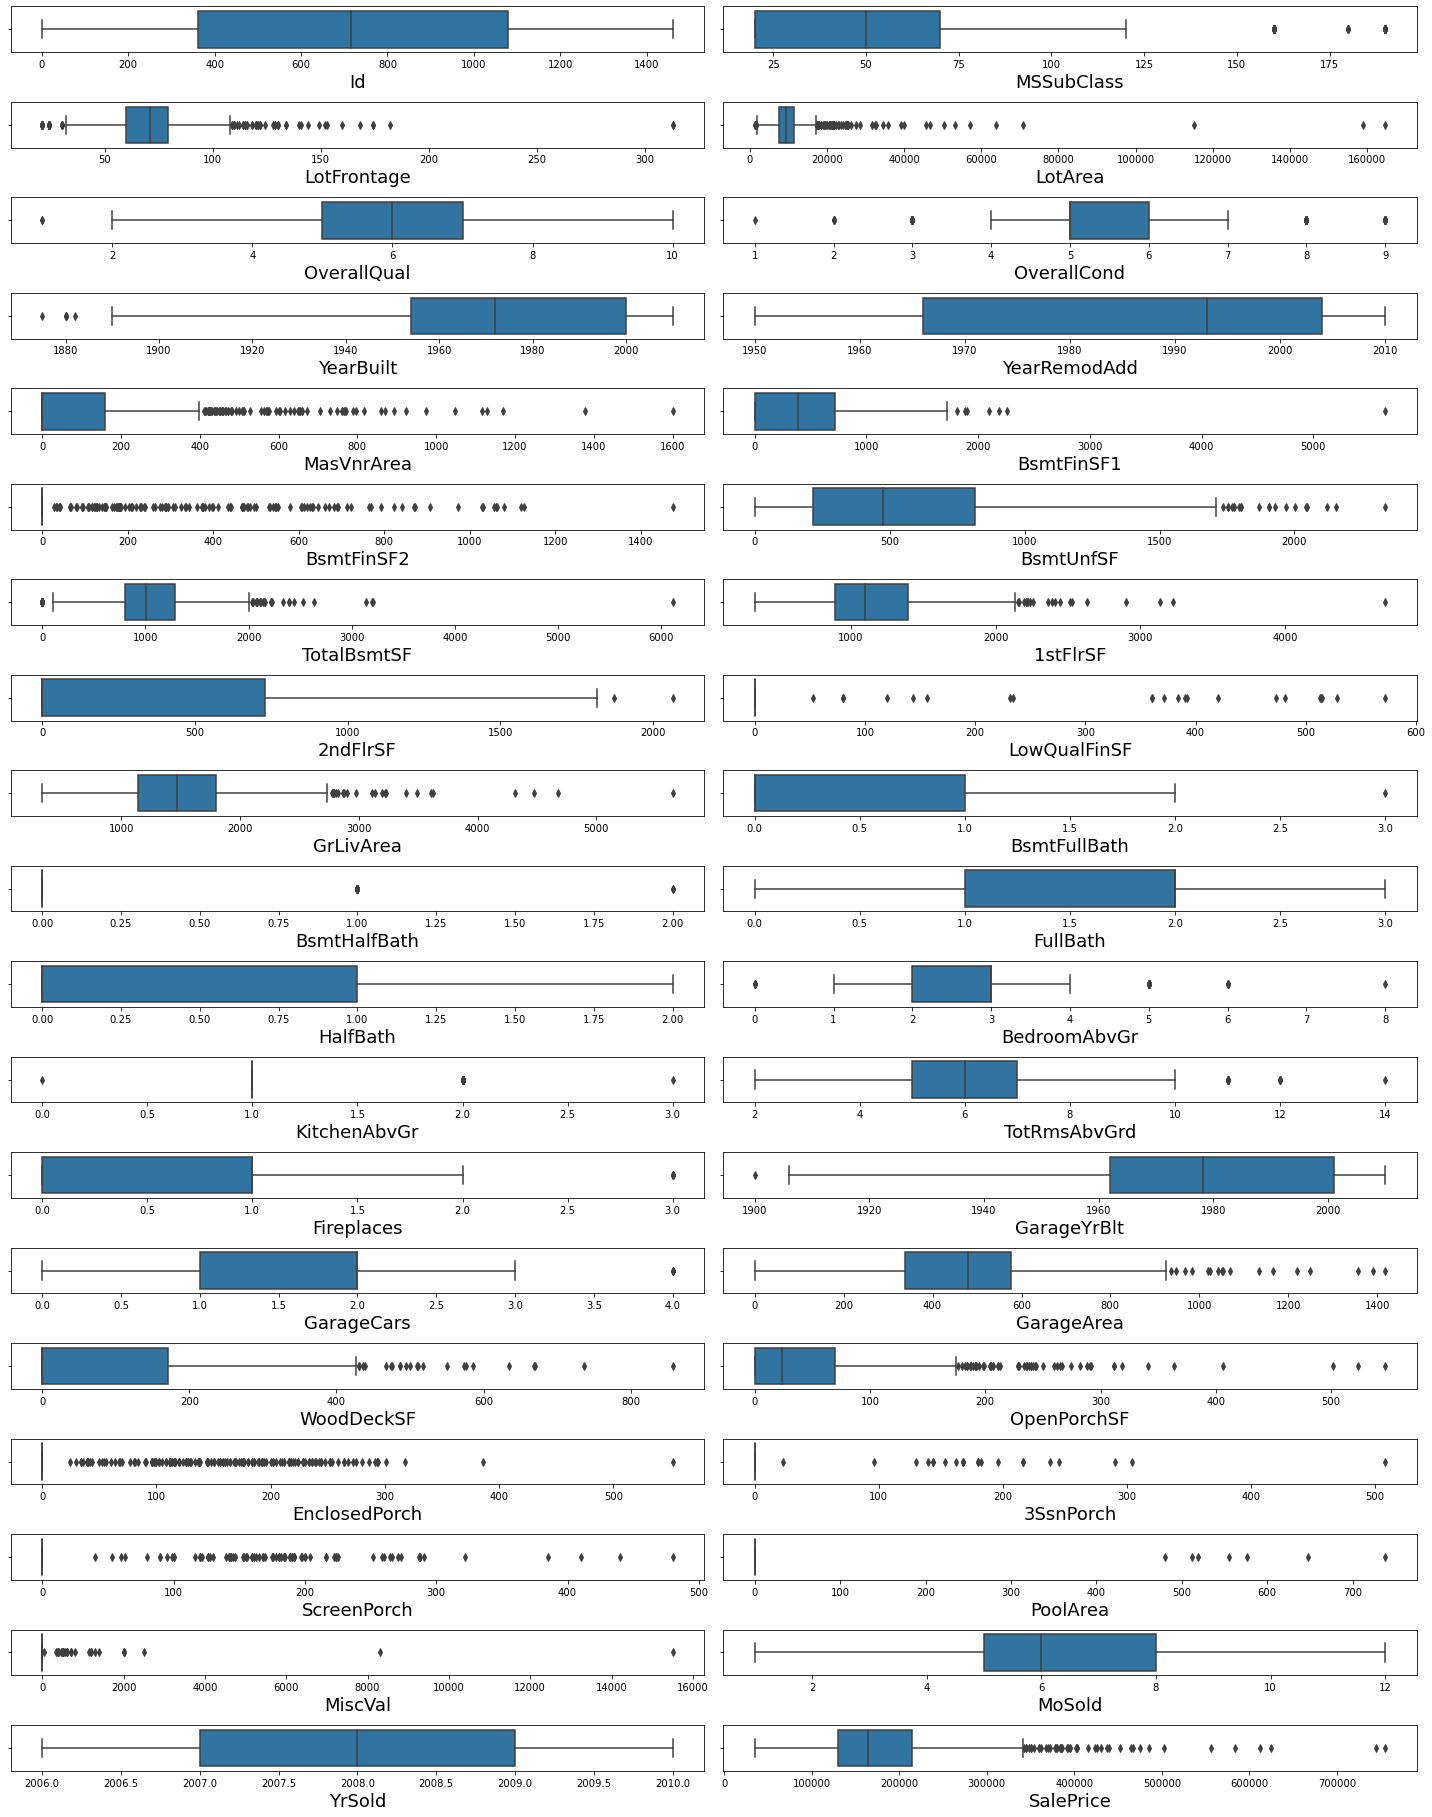

In [15]:
# Lets check for the presence of outliers in numerical columns using boxplot

plt.figure(figsize=(20,50))
n=1
for i in train.columns:
    if train[i].dtype!='O' and n<=41:
        ax=plt.subplot(38,2,n)
        sns.boxplot(train[i])
        plt.xlabel(i, fontsize=18)
        n+=1
    plt.tight_layout()

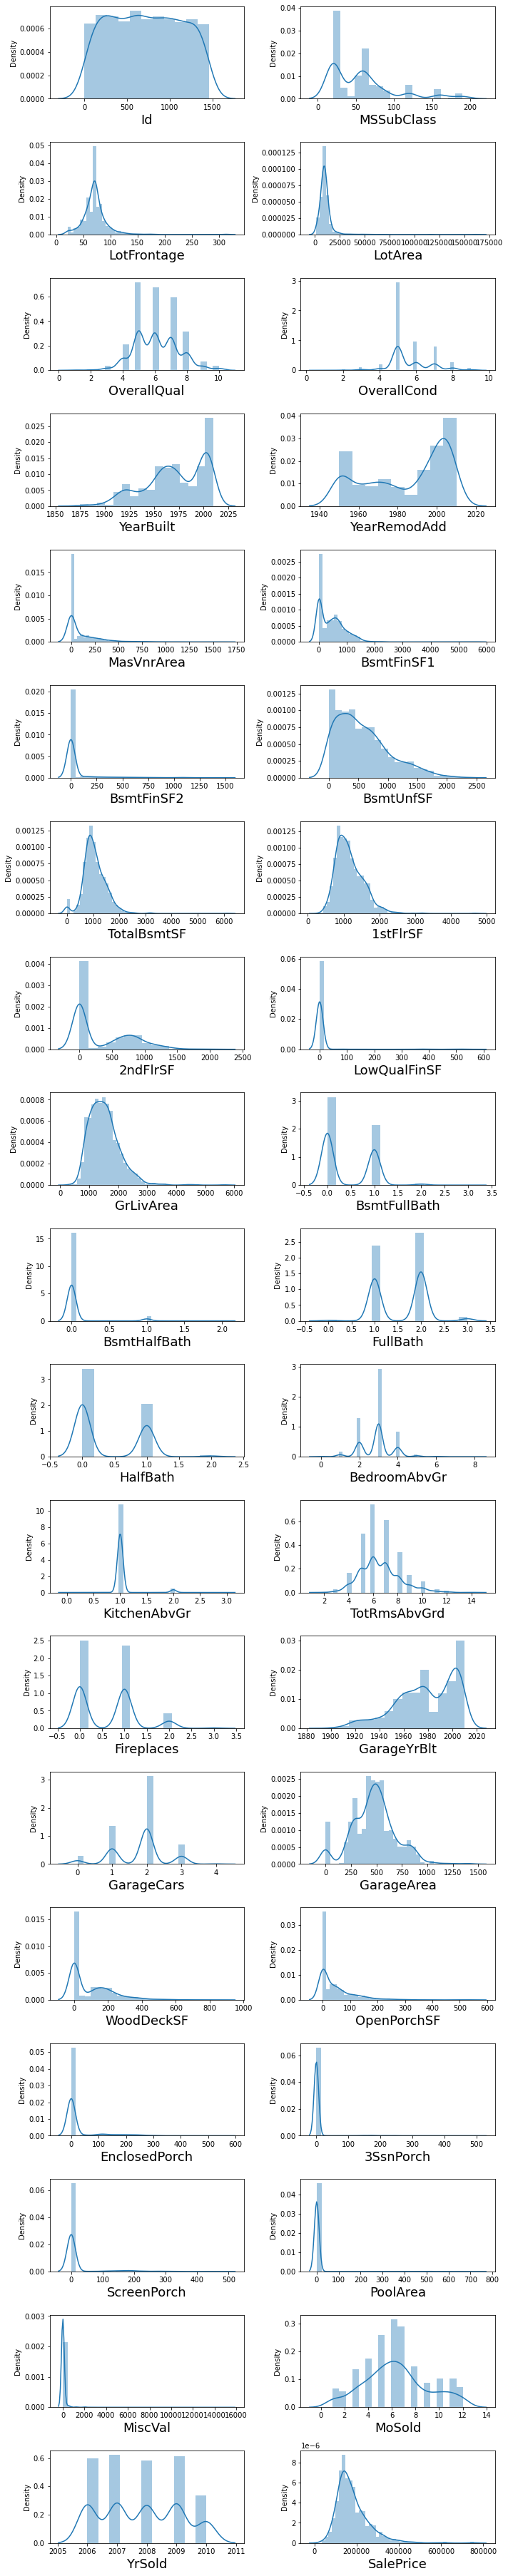

In [16]:
plt.figure(figsize=(10,100))
n=1
for i in train.columns:
    if train[i].dtype!='O' and n<=41:
        ax=plt.subplot(38,2,n)
        sns.distplot(train[i],kde=True)
        plt.xlabel(i, fontsize=18)
        n+=1
    plt.tight_layout()

# Feature Engineering

In [17]:
train.select_dtypes(include=['int16', 'int32', 'int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
# There is a need to convert the skewed distribution into gaussian or normal distribution.
for col in train.columns:
    if train[col].dtype!='object':
        if (col=='Id' or col=='SalePrice'):
            continue;
        if train[col].skew() > 0.5:
            train[col] = train[col].apply(lambda x: np.log1p(x))
            test[col] = test[col].apply(lambda x: np.log1p(x))

train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log1p(x)) 

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

cat=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
train[cat] = label.fit_transform(cat)
test[cat] = label.fit_transform(cat)

In [21]:
# Now let's split our data into training and validation.
features = train.drop(['Id','SalePrice'],axis=1)
target = train['SalePrice']

test_set = test.drop(['Id'],axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(features)
test_set = scaler.transform(test_set)

# Model Building

In [23]:
# Let's find best score with best state
def beststate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(72,75):
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=i)
        mod.fit(X_train, y_train)
        y_pre = mod.predict(X_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best R2_Score          : ",max_score)
    print("Cross Validation Score : ",cross_val_score(mod, features, target, cv=5, scoring="r2").mean())
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))

In [24]:
# K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
beststate(knr)

Best Random State      :  73
Best R2_Score          :  0.8167488311602309
Cross Validation Score :  0.7814946878164013

Time taken by model for prediction 0.0890 seconds


In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
beststate(dt)

Best Random State      :  72
Best R2_Score          :  0.7288358196885846
Cross Validation Score :  0.6661584106762032

Time taken by model for prediction 0.2135 seconds


In [26]:
# Support Vector Machine
from sklearn.svm import SVR
svr = SVR()
beststate(svr)

Best Random State      :  74
Best R2_Score          :  0.8652776650382791
Cross Validation Score :  0.8229042578128875

Time taken by model for prediction 3.6508 seconds


In [27]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
beststate(rf)

Best Random State      :  72
Best R2_Score          :  0.9002221663480634
Cross Validation Score :  0.8514674640232093

Time taken by model for prediction 12.0408 seconds


In [28]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
beststate(gbr)

Best Random State      :  72
Best R2_Score          :  0.8942378724562751
Cross Validation Score :  0.8718725861893686

Time taken by model for prediction 4.6289 seconds


# Hyper parameter tuning 

In [29]:
# Hyper Parameter Tuning with Gradient Boosting Regressor

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=72)

from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_leaf" : [1,2,3],
              "min_samples_split" : [2,3,4],
              "n_estimators" : [100,200],
              "learning_rate" : [0.1,0.2]}
grid_search = GridSearchCV(gbr, param_grid=param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [30]:
# Final Model
best_model = GradientBoostingRegressor(learning_rate=0.1,min_samples_split=2,min_samples_leaf=1,n_estimators=200)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=72)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.8947724792730296

# Save Model

In [31]:
import joblib
joblib.dump(best_model,"Housing Price Prediction.pkl")

['Housing Price Prediction.pkl']

# Prediction

In [32]:
y_output = best_model.predict(test_set)

y_output = np.expm1(y_output)
pd.DataFrame({'Id':test.Id,'SalePrice':y_output}).to_csv('house price prediction - test dataset.csv', index=False)

out = pd.read_csv(r'house price prediction - test dataset.csv')
out.head()

,Id,SalePrice
0,337,353577.882240
1,1018,193341.979216
2,929,241558.706276
3,1148,172418.166948
4,1227,195998.090457
